# Logistic Regression and Gradient Descent Homework
- In this homework we study **titanic** dataset using logistic regression 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('Titanic.csv', index_col=0)
titanic.shape

(1313, 6)

## Question 1
### Part A - Missing Values Imputation

- Check if there are missing values
- It turns out only **Age** column has missing values
- There is a unique sample with PClass='*', sexCode=0 and no age information
- Remove this sample from the titanic dataframe
- Store the Survived column into a pandas series
- Create a new data frame using the 'PClass', 'SexCode', 'Age' columns (don't forget to use .copy() to create a copy with fresh memory)
- We would like to impute the missing **Age** values using the means of the corresponding 'PClass', 'SexCode' groups which the samples fall in
- ${\bf Hint}$: One way to impute using the result of groupby is 
    - converting the groupby result into a dictionary using to_dict method
    - using panda series **apply** method on a lambda function, where the lambda function is defined using the above dictionary
    
- ${\bf Remark}$: **SexCode** is the binary integer encoding of gender    

In [3]:
titanic

Name          0
PClass        0
Age         557
Sex           0
Survived      0
SexCode       0
dtype: int64

In [4]:
titanic1 = titanic.copy()
titanic1 = titanic1[?] # remove the unique sample with PClass '*'

In [5]:
Survived = titanic1.Survived
titanic2 = titanic1.drop(?, axis=1).copy()

In [6]:
imputation_dict = titanic2.groupby(?).mean().?  # how to convert a dataframe to a python dictionary
imputation_dict['Age']

{('1st', 0): 41.19936,
 ('1st', 1): 37.772277227722775,
 ('2nd', 0): 28.910472440944883,
 ('2nd', 1): 27.388235294117646,
 ('3rd', 0): 26.357222222222223,
 ('3rd', 1): 22.776176470588236}

In [7]:
missingRowIndexes = titanic2.Age.isnull()
# impute the value by using the above imputation_dict
titanic2.loc[?,'Age'] = titanic2[?].apply(?, axis=?)

In [8]:
# Verify there is no missing Age values any more
titanic2.?

PClass     0
Age        0
SexCode    0
dtype: int64

## Part B
- The **PClass** column can be treated as an ordinal categorical column.  If so,  we only need to convert the string values into
integer labels
- Alternatively, one can treat **PClass** as a nominal categorical column and dummify it
- In either way, fit a logistic regression model and compute its accuracy
- Set the logistic regression model hyperparameter $C$ to $1e4$ to disable **Ridge** penality

In [9]:
# Convert the string values into integers 
titanic2.PClass = titanic2.PClass.map(?)

In [10]:
Survived.? # about 1/3 of the passengers survive

0    862
1    450
Name: Survived, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=1e4)
logistic.fit(?,?)
logistic.score(?,?)

0.8155487804878049

In [ ]:
## Dummify the PClass nominal categorical column

In [12]:
U = pd.get_dummies(?, prefix='Class')
titanic_dummified = pd.concat((?, ?), axis=1)

In [13]:
logistic.fit(?, ?)
logistic.score(?, ?)

0.8163109756097561

## Part C
- In this part we use the features 'Age', 'SexCode', 'Survived' to predict the multiclass labels **PClass**
- Fit a logistic regression model through the default **ovr** ensembling technique and study its performance
- Among the three values of **PClass**, which class has the worse performance?

- ${\bf Hint}$: the **confusion_matrix** function in **sklearn.metrics** helps to discern the discrepancy of the true labels and predicted labels. It is used as confusion_matrix(true_label_series, predict_label_series)

In [14]:
X = titanic2[['Age', 'SexCode']].copy()
X['Survived'] = Survived
Y = titanic2['PClass']

In [15]:
logistic.fit?
logistic.score?

0.6425304878048781

- Very low accuracy, which class causes the poor performance?
- We investigate the class-by-class performance using confusion_matrix
- Visit http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html for a description

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(?,?)

array([[200,   0, 122],
       [ 87,   0, 192],
       [ 68,   0, 643]])

In [17]:
Y.?

3    711
1    322
2    279
Name: PClass, dtype: int64

- Because class $2$ has $279$ samples, it is class $2$ which is completely mis-classified by logistic regression classifier

## Question 2

In [18]:
from sklearn.linear_model import SGDClassifier

## Part A
- Train a gradient descent logistic regression model by setting the parameters of an **sgd** object properly
- The loss is specified to 'log' for **logistic regression**
- Notice that we turn **shuffle** to False to prevent randomness
- Setting $\alpha=0.0001$ is equivalent to setting $C=10000$ for the logisticRegression model
- Fit a gradient descent logistic regression with the binary labels **Survived** on 'Age', 'SexCode', 'PClass' and compute its accuracy
- Fit a gradient descent logistic regression with the 3-class **PClass** labels on 'Age', 'SexCode', 'Survived' and compute its accuracy

In [19]:
sgd = SGDClassifier(loss=?, max_iter=1e4, l1_ratio=0, alpha=1e-4, shuffle=?)

In [20]:
# Fit the binary classifier model
?

0.8140243902439024

In [21]:
# Fit the 3-class classifier model
?

0.541920731707317

## Part B
- Now turn on the **shuffle** flag to True and repeat what you do in Part A
- Run a for loop iterating through range(10) and store the accuracies into a list
- Plot the accuracies and verify that they are quite random

In [22]:
np.random.seed(0)
sgd.set_params(?)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0, learning_rate='optimal',
       loss='log', max_iter=10000.0, n_iter=None, n_jobs=1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Text(0,0.5,'accuracy score')

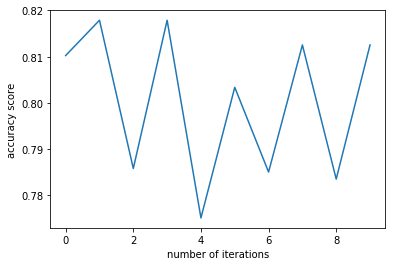

In [23]:
scores_binary = []
for i in range(10):
    sgd.?
    scores_binary.append(sgd.score(titanic2, Survived))

plt.plot(range(10), scores_binary) 
plt.xlabel('number of iterations')
plt.ylabel('accuracy score')

Text(0,0.5,'accuracy score')

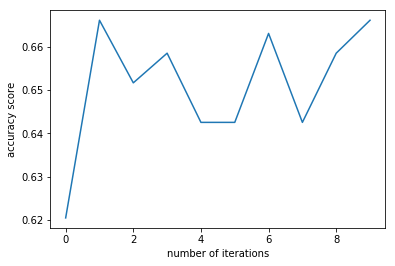

In [24]:
scores_PClass = []
for i in range(10):
    sgd.fit(X,Y)
    scores_PClass.append(sgd.score(X,Y))
  
plt.plot(range(10), scores_PClass)
plt.xlabel('number of iterations')
plt.ylabel('accuracy score')

## Part C
- Set **max_iter=None** and **tol=1e-6** through **set_params** **API**, then repeat the same computation as in part E
- What do you observe with the variations of accuracies?

In [25]:
sgd.set_params(?)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0, learning_rate='optimal',
       loss='log', max_iter=None, n_iter=None, n_jobs=1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=1e-06, verbose=0,
       warm_start=False)

Text(0,0.5,'accuracy score')

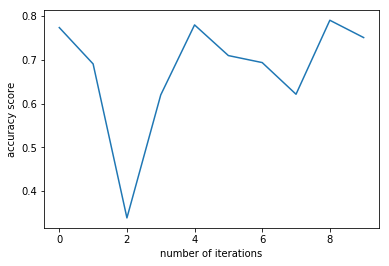

In [26]:
scores_binary = []
for i in range(10):
    sgd.?
    scores_binary.append(?)

plt.plot(range(10), scores_binary)    
plt.xlabel('number of iterations')
plt.ylabel('accuracy score')

Text(0,0.5,'accuracy score')

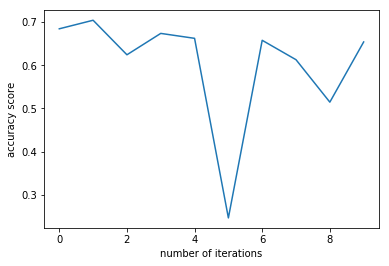

In [27]:
scores_PClass = []
for i in range(10):
    sgd.?
    scores_PClass.append(?)
  
plt.plot(range(10), scores_PClass)
plt.xlabel('number of iterations')
plt.ylabel('accuracy score')

## Remark:
- For both computations, the accuracies vary a lot during the $10$ iterations
- This shows that early stopping based on tolerance can lead to insufficient number of iterations, which causes the
performance to swing wildly